<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Задание" data-toc-modified-id="Задание-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Задание</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Основная-часть" data-toc-modified-id="Основная-часть-1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span>Основная часть</a></span></li><li><span><a href="#Дополнительная-часть" data-toc-modified-id="Дополнительная-часть-1.0.2"><span class="toc-item-num">1.0.2&nbsp;&nbsp;</span>Дополнительная часть</a></span></li></ul></li></ul></li><li><span><a href="#Описания-полей" data-toc-modified-id="Описания-полей-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описания полей</a></span></li></ul></div>

# Задание

### Основная часть

* Попробовать построить все графики из тех, что были на уроке по Seaborn
* Попробовать графики из тех, что были на уроке в Matplotlib и Plotly

### Дополнительная часть

* Некоторые данные представлены в агрегированном в виде в разном временном размере. Если вам нужны дополнительные переменные, то добавьте их в датасет.

* Опишите данную вам выборку, а так же кластеризуйте данные с помощь инструментов Python (количество кластеров на ваше усмотрение) и опишите полученные кластеры ( например, в первом кластере представлены клиенты с таким-то поведением или продуктовым наполнением).

* Для выполнения работы, пожалуйста, используйте Python. Задание мы ждем выполненным в Jupyter notebook с соответствующими комментариями.

# Описания полей

* age	возраст
* gender	пол repexc_date
* city_type	Тип города проживания клиента
* full_mob	Длительность взаимоотношений с банком

* ml_balance	ипотека
* cl_balance_0m	потребительский кредит
* loan_balance_0m	все кредиты

* td_balance_0m	депозит
* casa_balance_0m	счета

* dc_trx_cnt	количество трат по картам
* dc_trx_sum	сумма трат по картам
* Avg_trx	средний размер транзакции
* avgtrx_to_balance	


* min_casa_balance_1q	показатели по счетам за квартал
* max_casa_balance_1q	
* avg_casa_balance_1Y	показатели по счетам за год

* min_td_balance_1q	
* max_td_balance_1q	
* avg_td_balance_1Y

* min_loan_balance_1q	
* max_loan_balance_1q	
* avg_loan_balance_1Y

* min_cl_balance_1q	
* max_cl_balance_1q	
* avg_cl_balance_1Y	
* loan_to_deposit	

* income	доход клиента
* nbi	доход от клиента без OPEX

In [1]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from tqdm.auto import tqdm

In [2]:
df = pd.read_csv('test_cluster.csv', encoding='cp1251', sep=';')
df.head()

age gender city_type  full_mob  ml_balance  cl_balance_0m  loan_balance_0m  \
0   71    NaN      <100       103         0.0            0.0              0.0   
1   49    NaN      Mega        81         0.0            0.0              0.0   
2   56    NaN      Mega        81         0.0            0.0              0.0   
3   47    NaN      Mega        81         0.0            0.0              0.0   
4   74    NaN      Mega        81         0.0            0.0              0.0   

   td_balance_0m  casa_balance_0m  dc_trx_cnt  ...  min_loan_balance_1q  \
0            0.0           0.0000           0  ...                  0.0   
1            0.0        3272.9367           0  ...                  0.0   
2            0.0        6249.7550           6  ...                  0.0   
3            0.0       14354.9370           0  ...                  0.0   
4            0.0       91511.7691           0  ...                  0.0   

   max_loan_balance_1q  avg_loan_balance_1Y  min_cl_balance_1q  \
0                  0.0                  0.0                0.0   
1                  0.0                  0.0                0.0   
2                  0.0                  0.0                0.0   
3                  0.0                  0.0                0.0   
4                  0.0                  0.0                0.0   

   max_cl_balance_1q  avg_cl_balance_1Y  loan_to_deposit  Avg_trx  \
0                0.0                0.0              NaN      NaN   
1                0.0                0.0              NaN      NaN   
2                0.0                0.0              NaN   854.67   
3                0.0                0.0              NaN      NaN   
4                0.0                0.0              NaN      NaN   

   avgtrx_to_balance          nbi  
0                NaN          NaN  
1                NaN    28.762952  
2           0.083467  1973.335539  
3                NaN   364.008556  
4                NaN  6651.416562  

[5 rows x 28 columns]

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   age                  50000 non-null  int64  
 1   gender               49277 non-null  object 
 2   city_type            50000 non-null  object 
 3   full_mob             50000 non-null  int64  
 4   ml_balance           50000 non-null  float64
 5   cl_balance_0m        50000 non-null  float64
 6   loan_balance_0m      50000 non-null  float64
 7   td_balance_0m        50000 non-null  float64
 8   casa_balance_0m      50000 non-null  float64
 9   dc_trx_cnt           50000 non-null  int64  
 10  dc_trx_sum           50000 non-null  float64
 11  income               50000 non-null  float64
 12  min_casa_balance_1q  50000 non-null  float64
 13  max_casa_balance_1q  50000 non-null  float64
 14  avg_casa_balance_1Y  50000 non-null  float64
 15  min_td_balance_1q    50000 non-null 

In [4]:
df.city_type.unique()

array(['<100', 'Mega', '100-500', '1M+', '500-1000'], dtype=object)

In [5]:
df.gender.unique()

array([nan, 'М', 'F'], dtype=object)

In [6]:
sns.relplot(x='age', 
            y='full_mob', 
            data=df, 
            kind='line')
plt.title('Линейная диаграмма', size=20, color='g');

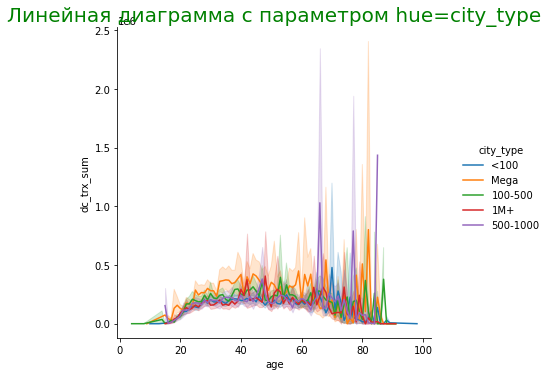

In [7]:
city_type_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(x='age',  
            y='dc_trx_sum', 
            hue='city_type',
            hue_order=city_type_order,
            data=df, 
            kind='line')
plt.title('Линейная диаграмма с параметром hue=city_type', size=20, color='g');

In [15]:
sns.relplot(x='age',  
            y='dc_trx_sum', 
            hue='gender',
            hue_order=['М', 'F'],
            data=df,
            kind='line')
plt.title('Линейная диаграмма c параметром hue=gender', size=20, color='g')

Text(0.5, 1.0, 'Линейная диаграмма c параметром hue=gender')

Text(0.5, 1.0, 'Линейная диаграмма c параметрами hue and style')

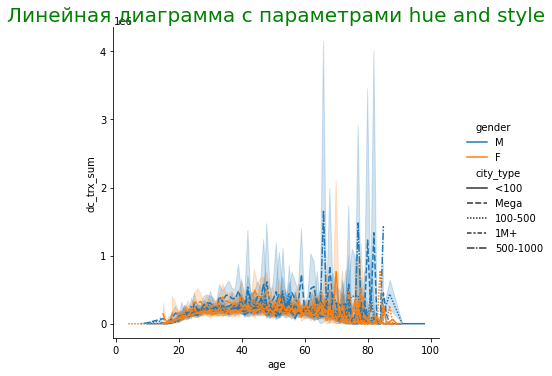

In [17]:
sns.relplot(x='age',  
            y='dc_trx_sum', 
            hue='gender',
            hue_order=['М', 'F'],
            style='city_type', 
            style_order= city_type_order , 
            kind='line', 
            data=df)
plt.title('Линейная диаграмма c параметрами hue and style', size=20, color='g')

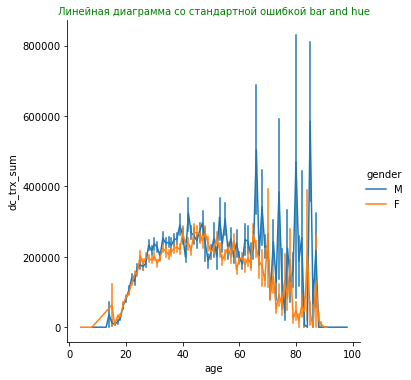

In [11]:
sns.relplot(x='age',  
            y='dc_trx_sum', 
            hue='gender', 
            data=df,
            kind='line',
           err_style="bars", ci=60)   
plt.title('Линейная диаграмма со стандартной ошибкой bar and hue', size=10, color='g');

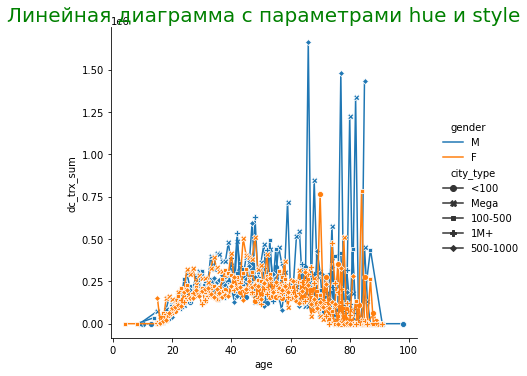

In [13]:
sns.relplot(x='age',  
            y='dc_trx_sum', 
            hue='gender',
            style='city_type', 
            dashes=False, 
            markers=True,
            data=df, kind='line', ci=None)
plt.title('Линейная диаграмма с параметрами hue и style', size=20, color='g');

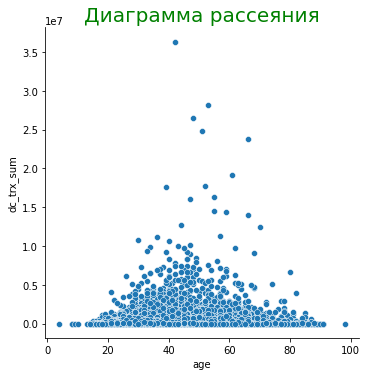

In [14]:
sns.relplot(x='age',  
            y='dc_trx_sum',
            data=df, 
            kind='scatter')
plt.title('Диаграмма рассеяния', size=20, color='g');

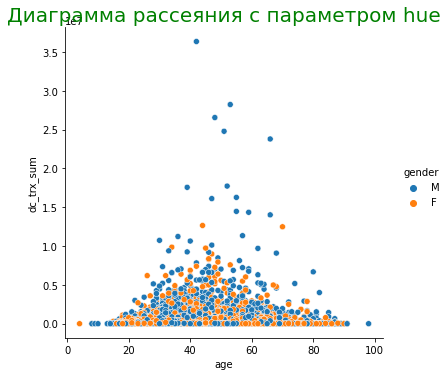

In [15]:
sns.relplot(x='age',  
            y='dc_trx_sum',
            hue='gender',
            data=df)
plt.title('Диаграмма рассеяния с параметром hue', size=20, color='g');

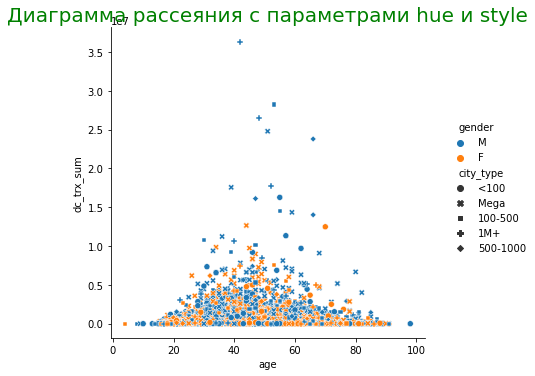

In [19]:
sns.relplot(x='age',  
            y='dc_trx_sum',
            hue='gender', 
            style='city_type', 
          
            data=df)
plt.title('Диаграмма рассеяния с параметрами hue и style', size=20, color='g');

In [20]:
city_type_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.relplot(
    x='age',  
    y='dc_trx_sum',
    hue='gender',
    col='city_type',
    col_wrap=3,
    col_order=city_type_order,
    data=df,
    height=3
);

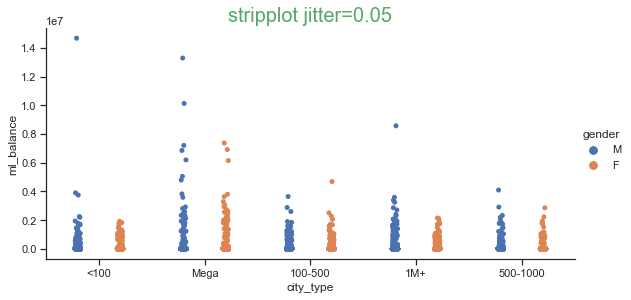

In [21]:
sns.set(style="ticks", color_codes=True)
city_type_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type',
    y='ml_balance', 
    data=df, 
    hue='gender',    # оба на одном графике разными цветами
    order=city_type_order, 
    jitter=0.05,
    height=4, 
    aspect=2, 
    kind='strip', 
    dodge=True) 
# Можно использовать dodge=True чтобы не накладывать показатели друг на друга, а выстроить рядом друг с другом
plt.title('stripplot jitter=0.05', size=20, color='g');

In [22]:
sns.catplot(
    x='city_type',
    y='ml_balance', 
    data=df.query("city_type != 'Mega'"), 
    order=['<100',  '100-500', '1M+', '500-1000'],
    palette='Set1', 
#     jitter=False, выстраивает все точки в линию
    height=4,
    aspect=2); 

plt.title('stripplot с параметром jitter, заданным по умолчанию', size=20, color='g');

In [ ]:
city_type_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
   x='city_type',
    y='full_mob', 
    data=df, 
    order=city_type_order, 
    hue='gender',
    kind='swarm',
    height=4, 
    aspect=2)
plt.title('swarmplot', size=20, color='g');

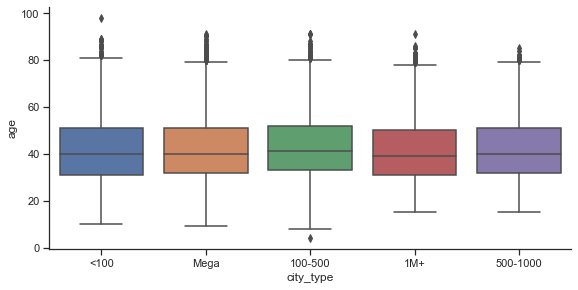

In [31]:
city_type_order = ['<100', 'Mega', '100-500', '1M+', '500-1000']
sns.catplot(
    x='city_type', 
    y='age', 
    data=df, 
    kind='box', 
    height=4, 
    aspect=2
); 

In [32]:
sns.catplot(
    x='city_type', 
    y='age', 
    data=df, 
    kind='box', 
    hue='gender',
    height=4, 
    aspect=2); 

In [33]:
sns.catplot(
    x='city_type', 
    y='age', 
    data=df, 
    kind='boxen', 
    hue='gender',
    height=4, 
    aspect=2);

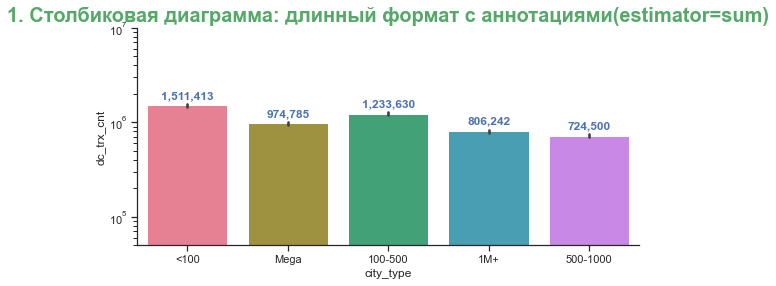

In [39]:
from numpy import median

plt.figure(figsize=(9,4))
b = sns.barplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df, 
    estimator=sum, 
    palette='husl')

b.set(yscale='log', ylim=[50000, 10000000])
sns.despine()

for bar in b.patches:
    b.annotate(
        "{:,}".format(bar.get_height()),
        (bar.get_x()+bar.get_width()/2.,
        bar.get_height()),
        ha='center',
        va='center',
        xytext=(0,10),
        textcoords='offset points', 
        color='b', 
        weight='bold'
    )

plt.title('1. Столбиковая диаграмма: длинный формат с аннотациями(estimator=sum)', size=20, color='g', 
          weight='bold');

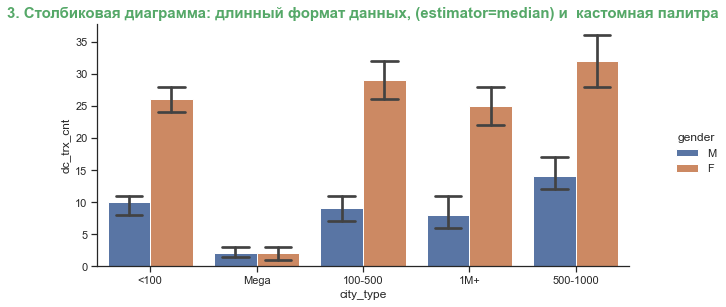

In [51]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df, 
    kind='bar', 
    hue='gender', 
    #hue_order=['M','F'], 
    #palette={"M": "r", "F": "indigo"},
    estimator=median, 
    capsize=0.25, 
    height=4, 
    aspect=2); 

plt.title('3. Столбиковая диаграмма: длинный формат данных, (estimator=median) и  кастомная палитра',
          size=15, 
          color='g', 
          weight='bold');

In [52]:
sns.catplot(
    x='city_type', 
    y='dc_trx_cnt', 
    data=df, 
    kind='violin', 
    hue='gender', 
    #hue_order=["M", "F"], 
    split=True, 
    height=4, 
    aspect=2) 

plt.title('2. Вертикальные виолончели с параметрами hue=Promotion, split=True', size=15, color='g', weight='bold');

In [59]:
sns.catplot(
    data=df, 
    kind='point', 
    ci=99.99, 
    capsize=0.25, 
    height=4,        # wide form df
    aspect=2, 
    order=['ml_balance','cl_balance_0m', 'loan_balance_0m','td_balance_0m']
)
plt.title('1. Точечная диаграмма с широким форматом данных', size=15, color='g', weight='bold'); 

In [61]:
sns.set(style='whitegrid', color_codes=True)

sns.distplot(
    df.age,
    color='g', 
    rug=True, 
    rug_kws={"color": 'm', "height": 0.1}
)
plt.title('1.Диаграмма распределения с параметром rug=True', size=15, color='g', weight='bold')
plt.show();

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2055: FutureWarning: The `axis` variable is no longer used and will be removed. Instead, assign variables directly to `x` or `y`.
  warnings.warn(msg, FutureWarning)


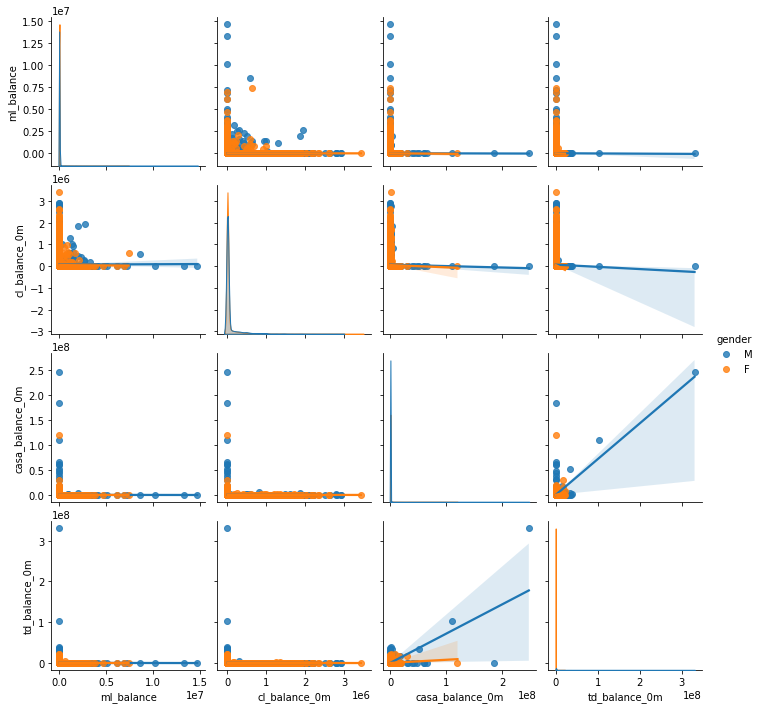

In [12]:
df_items = df.loc[:,['ml_balance','cl_balance_0m', 'casa_balance_0m','td_balance_0m','gender']]
sns.pairplot(
    df_items,
    hue='gender',
    kind='reg')
plt.show();

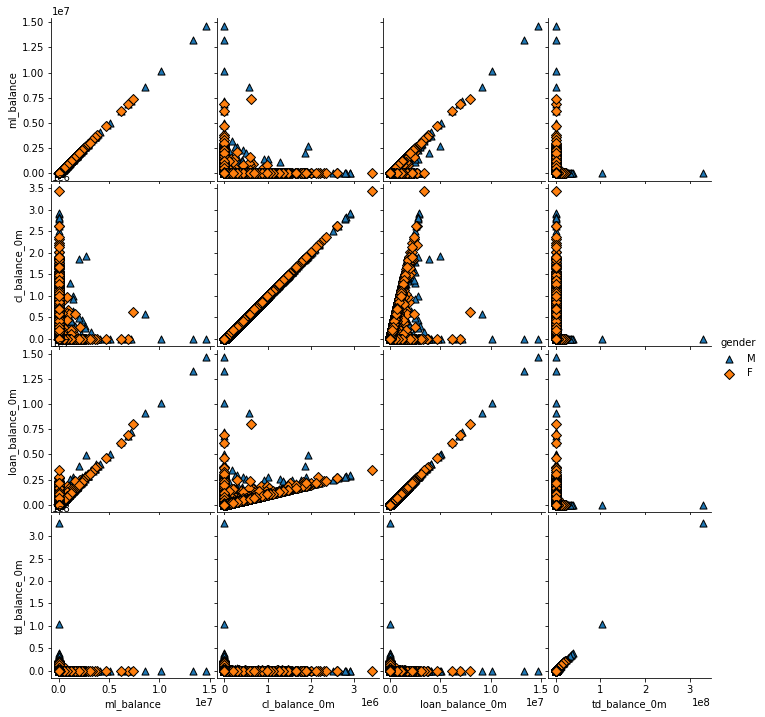

In [11]:
g = sns.PairGrid(
    df_items, 
    hue='gender', 
    hue_kws={"marker": ["^", "D"]}, 
    #palette={'M': 'blue', 'F': '#00a99f05'}
)
g.map(plt.scatter, edgecolor='k', s=50)
g.add_legend()
g.fig.subplots_adjust(wspace=.02, hspace=.02);